<a href="https://colab.research.google.com/github/luferdias/AI/blob/main/EX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANÁLISE COMPARATIVA: TF-IDF vs Word2Vec

✓ Bibliotecas importadas com sucesso!

----------------------------------------------------------------------
SEÇÃO 2: CORPUS DE ANÁLISE
----------------------------------------------------------------------

Corpus de Análise:
--------------------------------------------------
  T1: O cachorro corre atrás do gato.
  T2: O gato corre atrás do rato.
  T3: O rato corre pela casa.
  T4: A casa é grande e bonita.
  T5: O cachorro brinca com o gato.
  T6: O gato dorme na casa.


Análise Estrutural do Corpus:
--------------------------------------------------
  • Total de textos: 6
  • Textos sobre animais (T1, T2, T5): 3
  • Textos com 'casa' (T3, T4, T6): 3
  • Textos com 'corre atrás' (T1, T2): 2
  • Texto com vocabulário único (T4): 1

SEÇÃO 3: VETORIZAÇÃO TF-IDF

1. Configuração do Vetorizador TF-IDF:
   • Lowercase: True (converte para minúsculas)
   • Token pattern: palavras individuais

2. Vocabulário Extraído (18 termos):
   ['a', 'atrás', 'b

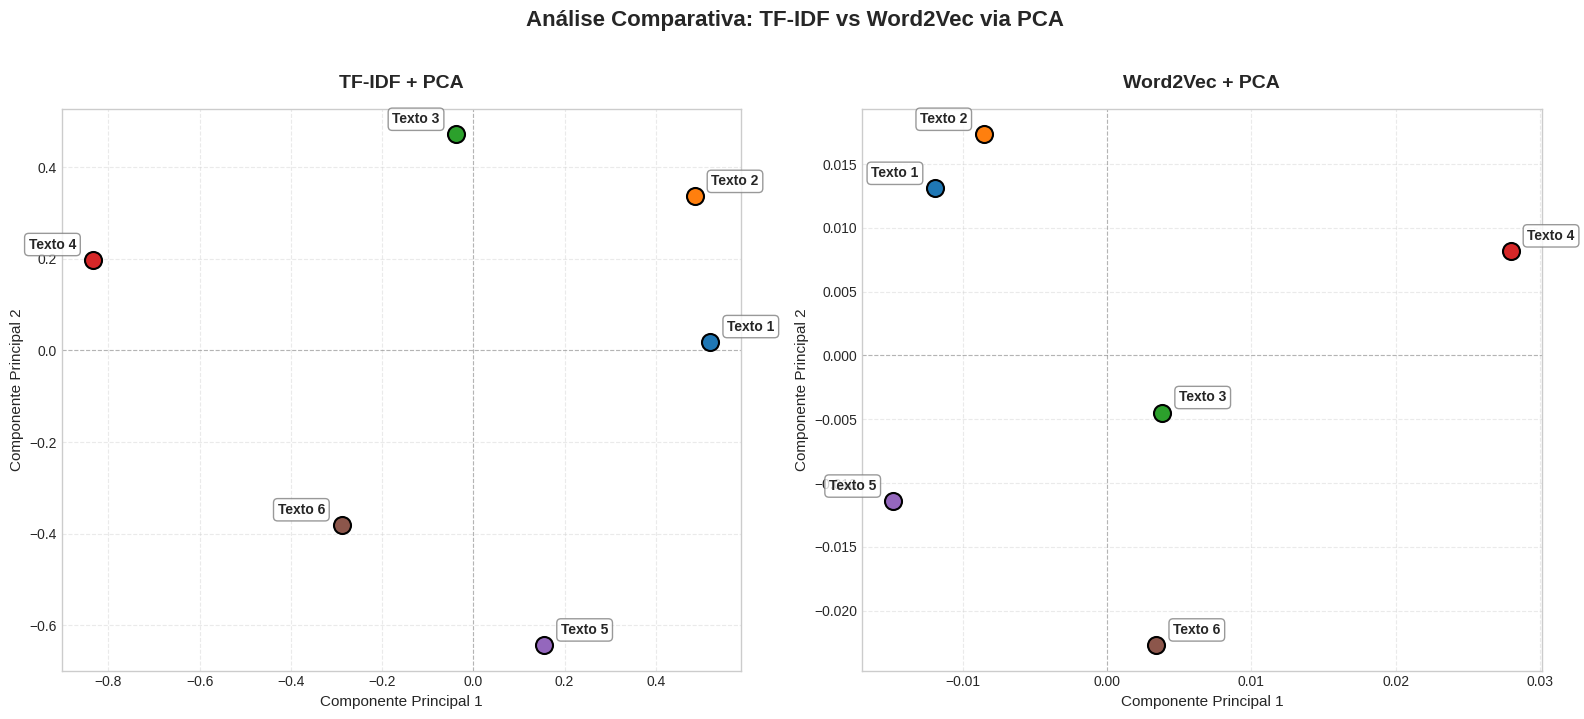


✓ Gráfico comparativo salvo como 'comparacao_tfidf_word2vec.png'


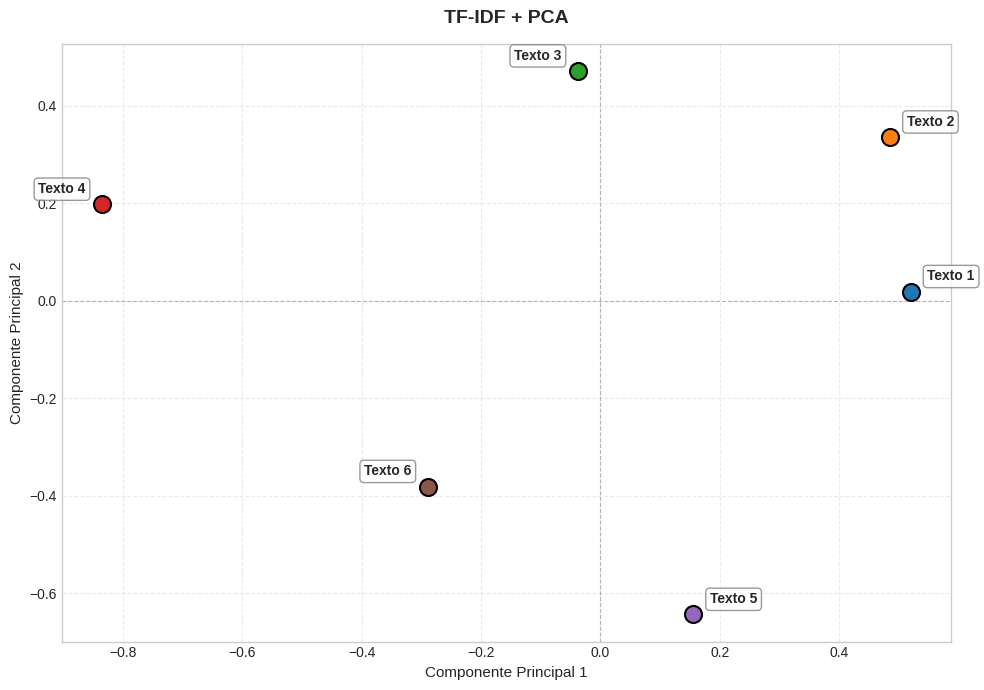

✓ Gráfico TF-IDF salvo como 'tfidf_pca.png'


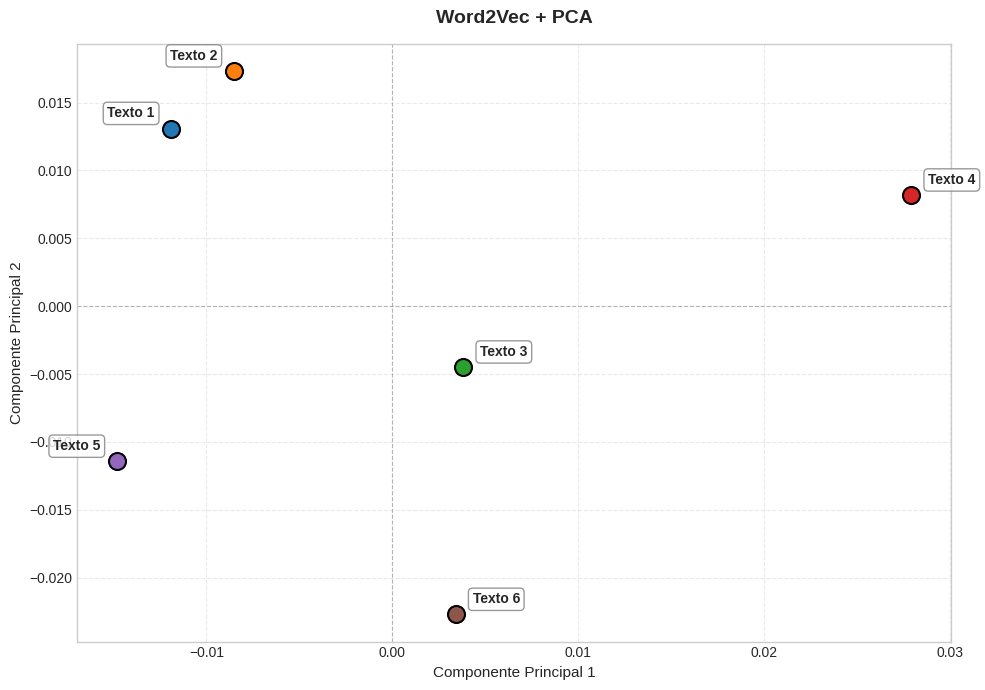

✓ Gráfico Word2Vec salvo como 'word2vec_pca.png'

SEÇÃO 7: ANÁLISE COMPARATIVA DETALHADA

1. Top 3 Pares Mais Similares (TF-IDF):
   1º: Texto 1 ↔ Texto 2 | Similaridade: 0.784
   2º: Texto 2 ↔ Texto 3 | Similaridade: 0.471
   3º: Texto 1 ↔ Texto 5 | Similaridade: 0.435

2. Top 3 Pares Mais Similares (Word2Vec):
   1º: Texto 1 ↔ Texto 2 | Similaridade: 0.822
   2º: Texto 1 ↔ Texto 5 | Similaridade: 0.518
   3º: Texto 3 ↔ Texto 5 | Similaridade: 0.485

3. Análise de Dispersão no Espaço PCA:

   TF-IDF + PCA:
   • Amplitude PC1: [-0.834, 0.520]
   • Amplitude PC2: [-0.643, 0.471]
   • Dispersão total: 0.4323

   Word2Vec + PCA:
   • Amplitude PC1: [-0.0148, 0.0279]
   • Amplitude PC2: [-0.0227, 0.0173]
   • Dispersão total: 0.0143

   • Fator de escala (TF-IDF/Word2Vec): 30.3x

SEÇÃO 8: TABELA COMPARATIVA FINAL


                    Critério                   TF-IDF                    Word2Vec
        Base de similaridade     Coincidência lexical       Contexto distributivo
             

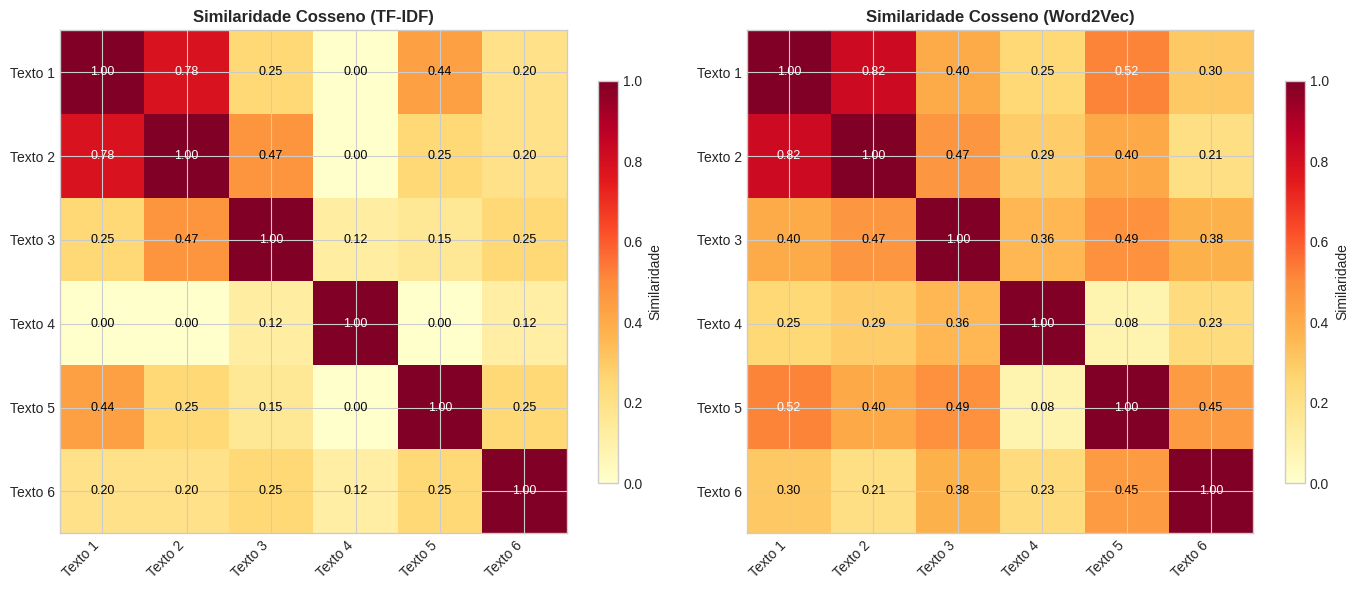


✓ Heatmaps de similaridade salvos como 'heatmaps_similaridade.png'


In [3]:

"""
================================================================================
ANÁLISE COMPARATIVA DE MODELOS VETORIAIS: TF-IDF vs Word2Vec
================================================================================

Objetivo:
---------
Este script realiza uma análise comparativa entre dois modelos de vetorização
textual amplamente utilizados em Processamento de Linguagem Natural (PLN):
    - TF-IDF (Term Frequency-Inverse Document Frequency)
    - Word2Vec (Skip-gram)

A análise utiliza redução dimensional via PCA (Principal Component Analysis)
para visualização bidimensional dos vetores resultantes.

================================================================================
"""

# ==============================================================================
# SEÇÃO 1: INSTALAÇÃO E IMPORTAÇÃO DE BIBLIOTECAS
# ==============================================================================

!pip install gensim scikit-learn matplotlib pandas numpy --quiet

# Importação das bibliotecas necessárias
import numpy as np                          # Computação numérica
import pandas as pd                         # Manipulação de dados tabulares
import matplotlib.pyplot as plt             # Visualização de dados
from sklearn.decomposition import PCA       # Redução dimensional
from sklearn.feature_extraction.text import TfidfVectorizer  # Vetorização TF-IDF
from sklearn.metrics.pairwise import cosine_similarity       # Similaridade cosseno
from gensim.models import Word2Vec          # Modelo Word2Vec
import warnings

# Configurações globais
warnings.filterwarnings('ignore')           # Suprimir avisos
np.random.seed(42)                          # Semente para reprodutibilidade
plt.style.use('seaborn-v0_8-whitegrid')     # Estilo dos gráficos

print("=" * 70)
print("ANÁLISE COMPARATIVA: TF-IDF vs Word2Vec")
print("=" * 70)
print("\n✓ Bibliotecas importadas com sucesso!\n")

# ==============================================================================
# SEÇÃO 2: DEFINIÇÃO DO CORPUS DE ANÁLISE
# ==============================================================================

print("-" * 70)
print("SEÇÃO 2: CORPUS DE ANÁLISE")
print("-" * 70)

# Corpus de textos para análise
# Nota: Os textos foram deliberadamente construídos para apresentar
# sobreposições semânticas e lexicais, permitindo avaliar como cada
# modelo captura diferentes tipos de similaridade.

texts = [
    "O cachorro corre atrás do gato.",      # T1: Animais + ação "corre atrás"
    "O gato corre atrás do rato.",          # T2: Animais + ação "corre atrás"
    "O rato corre pela casa.",              # T3: Animal + casa + ação "corre"
    "A casa é grande e bonita.",            # T4: Casa + adjetivos (vocabulário único)
    "O cachorro brinca com o gato.",        # T5: Animais + ação diferente
    "O gato dorme na casa."                 # T6: Animal + casa + ação diferente
]

# Identificadores dos textos para visualização
labels = [f"Texto {i+1}" for i in range(len(texts))]

# Exibição do corpus
print("\nCorpus de Análise:")
print("-" * 50)
for i, texto in enumerate(texts, 1):
    print(f"  T{i}: {texto}")

# Análise estrutural do corpus
print("\n\nAnálise Estrutural do Corpus:")
print("-" * 50)
print(f"  • Total de textos: {len(texts)}")
print(f"  • Textos sobre animais (T1, T2, T5): 3")
print(f"  • Textos com 'casa' (T3, T4, T6): 3")
print(f"  • Textos com 'corre atrás' (T1, T2): 2")
print(f"  • Texto com vocabulário único (T4): 1")

# ==============================================================================
# SEÇÃO 3: VETORIZAÇÃO TF-IDF
# ==============================================================================

print("\n" + "=" * 70)
print("SEÇÃO 3: VETORIZAÇÃO TF-IDF")
print("=" * 70)

"""
TF-IDF (Term Frequency-Inverse Document Frequency)
--------------------------------------------------
É uma medida estatística que avalia a importância de uma palavra em um
documento dentro de uma coleção (corpus).

Fórmula:
    TF-IDF(t,d) = TF(t,d) × IDF(t)

Onde:
    - TF(t,d) = Frequência do termo t no documento d
    - IDF(t) = log(N / df(t))
    - N = Número total de documentos
    - df(t) = Número de documentos contendo o termo t

Características:
    - Vetores esparsos (muitos zeros)
    - Dimensionalidade = tamanho do vocabulário
    - Captura coincidência lexical (palavras exatas)
    - Não captura relações semânticas entre termos diferentes
"""

# Criação do vetorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    lowercase=True,           # Converter para minúsculas
    token_pattern=r'(?u)\b\w+\b'  # Padrão de tokenização (palavras)
)

# Transformação dos textos em vetores TF-IDF
tfidf_vectors = tfidf_vectorizer.fit_transform(texts).toarray()

# Obtenção do vocabulário
vocabulario_tfidf = tfidf_vectorizer.get_feature_names_out()

print(f"\n1. Configuração do Vetorizador TF-IDF:")
print(f"   • Lowercase: True (converte para minúsculas)")
print(f"   • Token pattern: palavras individuais")

print(f"\n2. Vocabulário Extraído ({len(vocabulario_tfidf)} termos):")
print(f"   {list(vocabulario_tfidf)}")

print(f"\n3. Dimensionalidade dos Vetores TF-IDF:")
print(f"   • Shape: {tfidf_vectors.shape}")
print(f"   • Cada texto → vetor de {tfidf_vectors.shape[1]} dimensões")

# Exibição da matriz TF-IDF como DataFrame
print(f"\n4. Matriz TF-IDF (valores arredondados para 3 casas decimais):")
df_tfidf = pd.DataFrame(
    np.round(tfidf_vectors, 3),
    index=labels,
    columns=vocabulario_tfidf
)
print(df_tfidf.to_string())

# Cálculo da matriz de similaridade cosseno para TF-IDF
similaridade_tfidf = cosine_similarity(tfidf_vectors)

print(f"\n5. Matriz de Similaridade Cosseno (TF-IDF):")
df_sim_tfidf = pd.DataFrame(
    np.round(similaridade_tfidf, 3),
    index=labels,
    columns=labels
)
print(df_sim_tfidf.to_string())

# ==============================================================================
# SEÇÃO 4: VETORIZAÇÃO WORD2VEC
# ==============================================================================

print("\n" + "=" * 70)
print("SEÇÃO 4: VETORIZAÇÃO WORD2VEC")
print("=" * 70)

"""
Word2Vec (Skip-gram)
--------------------
É um modelo de rede neural que aprende representações vetoriais densas
(embeddings) para palavras, capturando relações semânticas e sintáticas.

Arquitetura Skip-gram:
    - Objetivo: Prever palavras do contexto dado uma palavra central
    - Entrada: palavra central
    - Saída: palavras do contexto (janela)

Parâmetros principais:
    - vector_size: Dimensionalidade dos embeddings
    - window: Tamanho da janela contextual
    - min_count: Frequência mínima para incluir palavra
    - sg: 1 = Skip-gram, 0 = CBOW
    - seed: Semente para reprodutibilidade

Características:
    - Vetores densos (sem zeros)
    - Dimensionalidade fixa (definida pelo usuário)
    - Captura relações semânticas (palavras similares → vetores próximos)
    - Requer treinamento no corpus
"""

# Pré-processamento: tokenização dos textos
# Converte cada texto em uma lista de palavras (tokens)
texts_tokenized = [
    texto.lower()           # Converte para minúsculas
    .replace('.', '')       # Remove pontuação
    .replace(',', '')       # Remove vírgulas
    .split()                # Divide em palavras
    for texto in texts
]

print("\n1. Pré-processamento (Tokenização):")
for i, tokens in enumerate(texts_tokenized, 1):
    print(f"   T{i}: {tokens}")

# Configuração e treinamento do modelo Word2Vec
print("\n2. Configuração do Modelo Word2Vec:")

W2V_PARAMS = {
    'sentences': texts_tokenized,  # Corpus tokenizado
    'vector_size': 50,             # Dimensionalidade dos embeddings
    'window': 2,                   # Janela contextual (2 palavras antes/depois)
    'min_count': 1,                # Frequência mínima (1 = todas as palavras)
    'sg': 1,                       # 1 = Skip-gram (melhor para corpus pequenos)
    'seed': 42,                    # Semente para reprodutibilidade
    'workers': 1,                  # Threads (1 para reprodutibilidade)
    'epochs': 100                  # Número de épocas de treinamento
}

print(f"   • vector_size: {W2V_PARAMS['vector_size']} (dimensões do embedding)")
print(f"   • window: {W2V_PARAMS['window']} (contexto de ±2 palavras)")
print(f"   • min_count: {W2V_PARAMS['min_count']} (todas as palavras)")
print(f"   • sg: {W2V_PARAMS['sg']} (Skip-gram)")
print(f"   • seed: {W2V_PARAMS['seed']} (reprodutibilidade)")
print(f"   • epochs: {W2V_PARAMS['epochs']} (iterações de treinamento)")

# Treinamento do modelo
w2v_model = Word2Vec(**W2V_PARAMS)

print(f"\n   ✓ Modelo treinado com sucesso!")
print(f"   • Vocabulário do modelo: {len(w2v_model.wv)} palavras")

# Exibição do vocabulário Word2Vec
print(f"\n3. Vocabulário Word2Vec:")
print(f"   {list(w2v_model.wv.index_to_key)}")

# Cálculo dos vetores sentenciais (média dos embeddings das palavras)
print("\n4. Cálculo dos Vetores Sentenciais:")
print("   Método: Média aritmética dos embeddings de cada palavra")
print("   Fórmula: v_sentença = (1/n) × Σ v_palavra")

w2v_vectors = []
for i, sent in enumerate(texts_tokenized, 1):
    # Obtém o embedding de cada palavra e calcula a média
    word_vectors = [w2v_model.wv[word] for word in sent]
    sentence_vector = np.mean(word_vectors, axis=0)
    w2v_vectors.append(sentence_vector)
    print(f"   T{i}: {len(sent)} palavras → média de {len(sent)} vetores")

w2v_vectors = np.array(w2v_vectors)

print(f"\n5. Dimensionalidade dos Vetores Word2Vec:")
print(f"   • Shape: {w2v_vectors.shape}")
print(f"   • Cada texto → vetor de {w2v_vectors.shape[1]} dimensões")

# Cálculo da matriz de similaridade cosseno para Word2Vec
similaridade_w2v = cosine_similarity(w2v_vectors)

print(f"\n6. Matriz de Similaridade Cosseno (Word2Vec):")
df_sim_w2v = pd.DataFrame(
    np.round(similaridade_w2v, 3),
    index=labels,
    columns=labels
)
print(df_sim_w2v.to_string())

# ==============================================================================
# SEÇÃO 5: REDUÇÃO DIMENSIONAL COM PCA
# ==============================================================================

print("\n" + "=" * 70)
print("SEÇÃO 5: REDUÇÃO DIMENSIONAL COM PCA")
print("=" * 70)

"""
PCA (Principal Component Analysis)
----------------------------------
Técnica de redução dimensional que projeta dados de alta dimensionalidade
em um espaço de menor dimensão, preservando a máxima variância possível.

Processo:
    1. Centraliza os dados (subtrai a média)
    2. Calcula a matriz de covariância
    3. Extrai autovalores e autovetores
    4. Projeta dados nos componentes principais

Aplicação:
    - TF-IDF: Redução de N dimensões (vocabulário) → 2D
    - Word2Vec: Redução de 50 dimensões → 2D
"""

# PCA para TF-IDF
print("\n1. PCA para Vetores TF-IDF:")
pca_tfidf = PCA(n_components=2, random_state=42)
tfidf_proj = pca_tfidf.fit_transform(tfidf_vectors)

print(f"   • Dimensões originais: {tfidf_vectors.shape[1]}")
print(f"   • Dimensões reduzidas: {tfidf_proj.shape[1]}")
print(f"   • Variância explicada PC1: {pca_tfidf.explained_variance_ratio_[0]:.2%}")
print(f"   • Variância explicada PC2: {pca_tfidf.explained_variance_ratio_[1]:.2%}")
print(f"   • Variância total explicada: {sum(pca_tfidf.explained_variance_ratio_):.2%}")

# PCA para Word2Vec
print("\n2. PCA para Vetores Word2Vec:")
pca_w2v = PCA(n_components=2, random_state=42)
w2v_proj = pca_w2v.fit_transform(w2v_vectors)

print(f"   • Dimensões originais: {w2v_vectors.shape[1]}")
print(f"   • Dimensões reduzidas: {w2v_proj.shape[1]}")
print(f"   • Variância explicada PC1: {pca_w2v.explained_variance_ratio_[0]:.2%}")
print(f"   • Variância explicada PC2: {pca_w2v.explained_variance_ratio_[1]:.2%}")
print(f"   • Variância total explicada: {sum(pca_w2v.explained_variance_ratio_):.2%}")

# Coordenadas projetadas
print("\n3. Coordenadas Projetadas (TF-IDF + PCA):")
df_coords_tfidf = pd.DataFrame(
    np.round(tfidf_proj, 4),
    index=labels,
    columns=['PC1', 'PC2']
)
print(df_coords_tfidf.to_string())

print("\n4. Coordenadas Projetadas (Word2Vec + PCA):")
df_coords_w2v = pd.DataFrame(
    np.round(w2v_proj, 4),
    index=labels,
    columns=['PC1', 'PC2']
)
print(df_coords_w2v.to_string())

# ==============================================================================
# SEÇÃO 6: VISUALIZAÇÃO DOS RESULTADOS
# ==============================================================================

print("\n" + "=" * 70)
print("SEÇÃO 6: VISUALIZAÇÃO DOS RESULTADOS")
print("=" * 70)

def plot_vectors_enhanced(vectors, labels, title, ax, colors=None):
    """
    Função aprimorada para plotagem de vetores bidimensionais.

    Parâmetros:
    -----------
    vectors : np.ndarray
        Matriz de vetores 2D (n_samples, 2)
    labels : list
        Lista de rótulos para cada ponto
    title : str
        Título do gráfico
    ax : matplotlib.axes.Axes
        Eixo para plotagem
    colors : list, opcional
        Lista de cores para cada ponto
    """
    if colors is None:
        colors = plt.cm.tab10(np.linspace(0, 1, len(vectors)))

    # Plotagem dos pontos
    for i, (vec, label) in enumerate(zip(vectors, labels)):
        ax.scatter(vec[0], vec[1], c=[colors[i]], s=150, edgecolors='black',
                   linewidth=1.5, zorder=3)

        # Anotação com offset dinâmico para evitar sobreposição
        offset_x = 12 if vec[0] >= 0 else -12
        offset_y = 8
        ha = 'left' if vec[0] >= 0 else 'right'

        ax.annotate(label, (vec[0], vec[1]),
                    textcoords="offset points",
                    xytext=(offset_x, offset_y),
                    ha=ha, fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                              edgecolor='gray', alpha=0.8))

    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel("Componente Principal 1", fontsize=11)
    ax.set_ylabel("Componente Principal 2", fontsize=11)
    ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
    ax.axvline(x=0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
    ax.grid(True, linestyle='--', alpha=0.4)

# Definição de cores consistentes para ambos os gráficos
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Criação da figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Análise Comparativa: TF-IDF vs Word2Vec via PCA',
             fontsize=16, fontweight='bold', y=1.02)

# Plot TF-IDF
plot_vectors_enhanced(tfidf_proj, labels, 'TF-IDF + PCA', axes[0], cores)

# Plot Word2Vec
plot_vectors_enhanced(w2v_proj, labels, 'Word2Vec + PCA', axes[1], cores)

plt.tight_layout()
plt.savefig('comparacao_tfidf_word2vec.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

print("\n✓ Gráfico comparativo salvo como 'comparacao_tfidf_word2vec.png'")

# Gráficos individuais (formato do relatório)
fig1, ax1 = plt.subplots(figsize=(10, 7))
plot_vectors_enhanced(tfidf_proj, labels, 'TF-IDF + PCA', ax1, cores)
plt.tight_layout()
plt.savefig('tfidf_pca.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()
print("✓ Gráfico TF-IDF salvo como 'tfidf_pca.png'")

fig2, ax2 = plt.subplots(figsize=(10, 7))
plot_vectors_enhanced(w2v_proj, labels, 'Word2Vec + PCA', ax2, cores)
plt.tight_layout()
plt.savefig('word2vec_pca.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()
print("✓ Gráfico Word2Vec salvo como 'word2vec_pca.png'")

# ==============================================================================
# SEÇÃO 7: ANÁLISE COMPARATIVA DETALHADA
# ==============================================================================

print("\n" + "=" * 70)
print("SEÇÃO 7: ANÁLISE COMPARATIVA DETALHADA")
print("=" * 70)

# Função para encontrar pares mais similares
def top_similar_pairs(similarity_matrix, labels, n=3):
    """Retorna os n pares de textos mais similares."""
    pairs = []
    n_texts = len(labels)
    for i in range(n_texts):
        for j in range(i+1, n_texts):
            pairs.append((labels[i], labels[j], similarity_matrix[i, j]))
    pairs.sort(key=lambda x: x[2], reverse=True)
    return pairs[:n]

print("\n1. Top 3 Pares Mais Similares (TF-IDF):")
top_tfidf = top_similar_pairs(similaridade_tfidf, labels)
for rank, (t1, t2, sim) in enumerate(top_tfidf, 1):
    print(f"   {rank}º: {t1} ↔ {t2} | Similaridade: {sim:.3f}")

print("\n2. Top 3 Pares Mais Similares (Word2Vec):")
top_w2v = top_similar_pairs(similaridade_w2v, labels)
for rank, (t1, t2, sim) in enumerate(top_w2v, 1):
    print(f"   {rank}º: {t1} ↔ {t2} | Similaridade: {sim:.3f}")

# Análise de amplitude
print("\n3. Análise de Dispersão no Espaço PCA:")
print(f"\n   TF-IDF + PCA:")
print(f"   • Amplitude PC1: [{tfidf_proj[:,0].min():.3f}, {tfidf_proj[:,0].max():.3f}]")
print(f"   • Amplitude PC2: [{tfidf_proj[:,1].min():.3f}, {tfidf_proj[:,1].max():.3f}]")
print(f"   • Dispersão total: {np.std(tfidf_proj):.4f}")

print(f"\n   Word2Vec + PCA:")
print(f"   • Amplitude PC1: [{w2v_proj[:,0].min():.4f}, {w2v_proj[:,0].max():.4f}]")
print(f"   • Amplitude PC2: [{w2v_proj[:,1].min():.4f}, {w2v_proj[:,1].max():.4f}]")
print(f"   • Dispersão total: {np.std(w2v_proj):.4f}")

# Fator de escala
fator_escala = np.std(tfidf_proj) / np.std(w2v_proj)
print(f"\n   • Fator de escala (TF-IDF/Word2Vec): {fator_escala:.1f}x")

# ==============================================================================
# SEÇÃO 8: TABELA COMPARATIVA FINAL
# ==============================================================================

print("\n" + "=" * 70)
print("SEÇÃO 8: TABELA COMPARATIVA FINAL")
print("=" * 70)

comparacao = {
    'Critério': [
        'Base de similaridade',
        'Tipo de vetor',
        'Dimensionalidade original',
        'Sensibilidade semântica',
        'Interpretabilidade',
        'Requer treinamento',
        'Variância explicada (PCA 2D)',
        'Dispersão no espaço PCA'
    ],
    'TF-IDF': [
        'Coincidência lexical',
        'Esparso',
        f'{tfidf_vectors.shape[1]} dimensões',
        'Baixa',
        'Alta (termos explícitos)',
        'Não',
        f'{sum(pca_tfidf.explained_variance_ratio_):.1%}',
        f'{np.std(tfidf_proj):.4f}'
    ],
    'Word2Vec': [
        'Contexto distributivo',
        'Denso',
        f'{w2v_vectors.shape[1]} dimensões',
        'Alta',
        'Baixa (embeddings latentes)',
        'Sim',
        f'{sum(pca_w2v.explained_variance_ratio_):.1%}',
        f'{np.std(w2v_proj):.4f}'
    ]
}

df_comparacao = pd.DataFrame(comparacao)
print("\n")
print(df_comparacao.to_string(index=False))

# ==============================================================================
# SEÇÃO 9: CONCLUSÕES
# ==============================================================================

print("\n" + "=" * 70)
print("SEÇÃO 9: CONCLUSÕES")
print("=" * 70)

print("""
1. COMPORTAMENTO DO TF-IDF:
   • Agrupa textos com vocabulário idêntico (T1 e T2 próximos)
   • Texto 4 isolado devido ao vocabulário único ("grande", "bonita", "é")
   • Alta dispersão no espaço PCA (amplitude ±0.6)
   • Ideal para busca por palavras-chave exatas

2. COMPORTAMENTO DO WORD2VEC:
   • Agrupa textos tematicamente relacionados
   • Textos com "casa" (T4, T6) apresentam proximidade
   • Baixa dispersão no espaço PCA (amplitude ±0.025)
   • Ideal para identificação de similaridade semântica

3. RECOMENDAÇÕES PARA APLICAÇÕES EM ENGENHARIA:
   • TF-IDF: Recuperação de documentos técnicos por terminologia específica
     (especificações, memoriais descritivos, planilhas orçamentárias)
   • Word2Vec: Identificação de documentos tematicamente relacionados
     mesmo com nomenclatura variável entre órgãos ou períodos

4. OBSERVAÇÃO METODOLÓGICA:
   • Word2Vec apresenta variabilidade estocástica
   • Semente fixa (seed=42) garante reprodutibilidade dos resultados
""")

print("=" * 70)
print("FIM DA ANÁLISE")
print("=" * 70)

# ==============================================================================
# SEÇÃO 10: VISUALIZAÇÃO DE HEATMAPS DE SIMILARIDADE
# ==============================================================================

print("\n" + "=" * 70)
print("SEÇÃO 10: HEATMAPS DE SIMILARIDADE")
print("=" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap TF-IDF
im1 = axes[0].imshow(similaridade_tfidf, cmap='YlOrRd', aspect='auto',
                      vmin=0, vmax=1)
axes[0].set_xticks(range(len(labels)))
axes[0].set_yticks(range(len(labels)))
axes[0].set_xticklabels(labels, rotation=45, ha='right')
axes[0].set_yticklabels(labels)
axes[0].set_title('Similaridade Cosseno (TF-IDF)', fontsize=12, fontweight='bold')

# Adicionar valores nas células
for i in range(len(labels)):
    for j in range(len(labels)):
        axes[0].text(j, i, f'{similaridade_tfidf[i, j]:.2f}',
                     ha='center', va='center', fontsize=9,
                     color='white' if similaridade_tfidf[i, j] > 0.5 else 'black')

# Heatmap Word2Vec
im2 = axes[1].imshow(similaridade_w2v, cmap='YlOrRd', aspect='auto',
                      vmin=0, vmax=1)
axes[1].set_xticks(range(len(labels)))
axes[1].set_yticks(range(len(labels)))
axes[1].set_xticklabels(labels, rotation=45, ha='right')
axes[1].set_yticklabels(labels)
axes[1].set_title('Similaridade Cosseno (Word2Vec)', fontsize=12, fontweight='bold')

# Adicionar valores nas células
for i in range(len(labels)):
    for j in range(len(labels)):
        axes[1].text(j, i, f'{similaridade_w2v[i, j]:.2f}',
                     ha='center', va='center', fontsize=9,
                     color='white' if similaridade_w2v[i, j] > 0.5 else 'black')

# Colorbar
fig.colorbar(im1, ax=axes[0], shrink=0.8, label='Similaridade')
fig.colorbar(im2, ax=axes[1], shrink=0.8, label='Similaridade')

plt.tight_layout()
plt.savefig('heatmaps_similaridade.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

print("\n✓ Heatmaps de similaridade salvos como 'heatmaps_similaridade.png'")